# Resultados do Vestibulinho ETEC para Desenvolvimento de Sistemas em São José do Rio Preto

In [22]:
#Importações
import matplotlib.patheffects as path_effects
import pandas as pd
import seaborn as sns 
sns.set_style("whitegrid")

import numpy as np
import matplotlib.pyplot as plt


In [23]:
def add_median_labels(ax, fmt='.1f'):
    """Credits: https://stackoverflow.com/a/63295846/4865723
    """
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] -
                      median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])


In [7]:
#Lendo o arquivo CSC com os resultados:
df_resultado = pd.read_csv('Resultado_etec.csv.csv')
df_resultado

,Class.,Nº Inscrição,Nome,Nota,Afrodesc.,Esc. Pública,Situação
0,1,0098.00S.01309-2,GABRIEL SILVA BERNARDES OLIVEIRA,44,NÃO,SIM,Classificado
1,2,0098.00S.01315-8,PEDRO RUAN MADURO DA SILVA,"41,8",NÃO,SIM,Classificado
2,3,0098.00S.02707-8,ARTHUR ROCHA GRIGORIO DA SILVA,"38,5",NÃO,SIM,Classificado
3,4,0098.00S.00113-2,DAVI BERALDI DOS SANTOS,"38,5",NÃO,SIM,Classificado
4,5,0098.00S.02721-2,CARLOS HENRIQUE ALVES DA SILVA,"38,5",NÃO,SIM,Classificado
...,...,...,...,...,...,...,...
505,Desc.,0098.00S.00638-5,THIAGO FIORONI DIAS,AUSENTE,NÃO,NÃO,Ausente
506,Desc.,0098.00S.02958-0,VALERIA DA SILVA LEITE AUGUSTO,AUSENTE,NÃO,NÃO,Ausente
507,Desc.,0098.00S.01524-6,VICTOR HENRIQUE GUARNIERI,AUSENTE,NÃO,NÃO,Ausente
508,Desc.,0098.00S.02470-3,VICTOR HUGO GONCALVES PHILLIPS,AUSENTE,SIM,SIM,Ausente


In [8]:
#Retirando a Ausente da coluna Nota
df_resultado_sem_ausente=df_resultado.loc[df_resultado['Nota']!='AUSENTE']

# Transformando a coluna Nota em float e trocando a virgula por ponto.
df_resultado_sem_ausente['NOTA'] = df_resultado_sem_ausente['Nota'].map(
    lambda x: float(x.replace(',', '.')))
df_resultado_sem_ausente


C:\Users\miria\AppData\Local\Temp\ipykernel_2724\1295176425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultado_sem_ausente['NOTA'] = df_resultado_sem_ausente['Nota'].map(


,Class.,Nº Inscrição,Nome,Nota,Afrodesc.,Esc. Pública,Situação,NOTA
0,1,0098.00S.01309-2,GABRIEL SILVA BERNARDES OLIVEIRA,44,NÃO,SIM,Classificado,44.0
1,2,0098.00S.01315-8,PEDRO RUAN MADURO DA SILVA,"41,8",NÃO,SIM,Classificado,41.8
2,3,0098.00S.02707-8,ARTHUR ROCHA GRIGORIO DA SILVA,"38,5",NÃO,SIM,Classificado,38.5
3,4,0098.00S.00113-2,DAVI BERALDI DOS SANTOS,"38,5",NÃO,SIM,Classificado,38.5
4,5,0098.00S.02721-2,CARLOS HENRIQUE ALVES DA SILVA,"38,5",NÃO,SIM,Classificado,38.5
...,...,...,...,...,...,...,...,...
450,451,0098.00S.01707-3,JULIA ISADORA NEVES ALEXANDRE,"8,8",NÃO,SIM,Classificado,8.8
451,452,0098.00S.01891-0,LAURA BRITO LOPES,"8,8",NÃO,SIM,Classificado,8.8
452,453,0098.00S.02009-6,LUIZ EDUARDO DE SOUSA JUNIOR,"8,8",NÃO,SIM,Classificado,8.8
453,454,0098.00S.02540-9,BRENNO HENRIQUE RODRIGUES,8,NÃO,NÃO,Classificado,8.0


C:\Users\miria\AppData\Local\Temp\ipykernel_2724\72462380.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45,


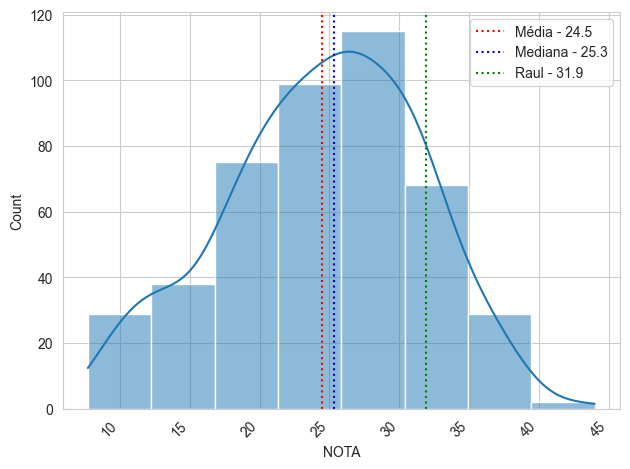

In [34]:
# Histograma da NOTA

ax = sns.histplot(data=df_resultado_sem_ausente,
                  x='NOTA', kde=True, bins=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
                   horizontalalignment='right')
media = round(df_resultado_sem_ausente.NOTA.mean(),1)
mediana = df_resultado_sem_ausente.NOTA.median()
nota_raul = 31.9

ax.axvline(media, color='r', linestyle='dotted', label=f'Média - {media}')
ax.axvline(mediana, color='b', linestyle='dotted', label=f'Mediana - {mediana}')
ax.axvline(nota_raul, color='g', linestyle='dotted',
           label=f'Raul - {nota_raul}')

ax.legend()

plt.tight_layout()

plt.show()


C:\Users\miria\AppData\Local\Temp\ipykernel_2724\1901201415.py:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(5, 45, 5)


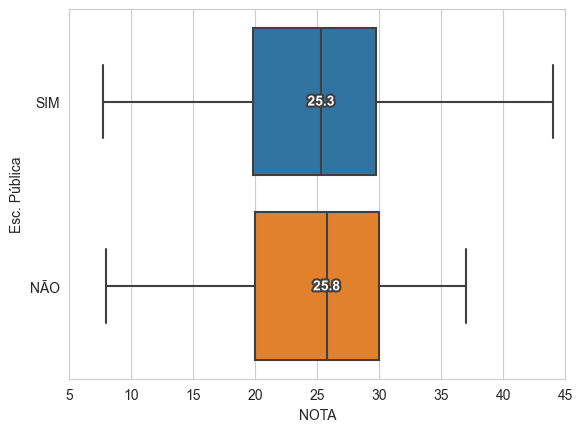

In [39]:
# Comparação boxplot Escola Pública
ax = sns.boxplot(data=df_resultado_sem_ausente, y='Esc. Pública', x='NOTA',   order=['SIM', 'NÃO'])
plt.xlim(5, 45, 5)
add_median_labels(ax)


#ax.set_xticks(quantiles)

plt.show()


##### Analisando os resultados da figura acima, é possível perceber pouca diferença entre os gráficos, refletindo que a escola pública parece não afetar significativamente a configuração de notas dos alunos.
##### Deve ser realçado que os alunos de escola pública recebem 10% a mais na pontuação, e os resultados mostram que pontuação é capaz de equilibrar as notas, diminuindo o gap da educação básica no país.
##### Por essa razão, o gráfico abaixo ira comparar a nota dos estudantes de escola pública, sem os 10% com a nota dos estudantes de escola particular.


In [49]:
nota_pura = []
for i in range(0, len(df_resultado_sem_ausente)):
    if df_resultado_sem_ausente['Esc. Pública'][i] == 'SIM':
        nota = round(df_resultado_sem_ausente['NOTA'][i] - \
            df_resultado_sem_ausente['NOTA'][i]*0.1,1)
        nota_pura.append(nota)
    else:
        nota_pura.append(df_resultado_sem_ausente['NOTA'][i])

df_resultado_sem_ausente['nota_pura'] = nota_pura
df_resultado_sem_ausente

C:\Users\miria\AppData\Local\Temp\ipykernel_2724\3674816711.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultado_sem_ausente['nota_pura'] = nota_pura


,Class.,Nº Inscrição,Nome,Nota,Afrodesc.,Esc. Pública,Situação,NOTA,nota_pura
0,1,0098.00S.01309-2,GABRIEL SILVA BERNARDES OLIVEIRA,44,NÃO,SIM,Classificado,44.0,39.6
1,2,0098.00S.01315-8,PEDRO RUAN MADURO DA SILVA,"41,8",NÃO,SIM,Classificado,41.8,37.6
2,3,0098.00S.02707-8,ARTHUR ROCHA GRIGORIO DA SILVA,"38,5",NÃO,SIM,Classificado,38.5,34.6
3,4,0098.00S.00113-2,DAVI BERALDI DOS SANTOS,"38,5",NÃO,SIM,Classificado,38.5,34.6
4,5,0098.00S.02721-2,CARLOS HENRIQUE ALVES DA SILVA,"38,5",NÃO,SIM,Classificado,38.5,34.6
...,...,...,...,...,...,...,...,...,...
450,451,0098.00S.01707-3,JULIA ISADORA NEVES ALEXANDRE,"8,8",NÃO,SIM,Classificado,8.8,7.9
451,452,0098.00S.01891-0,LAURA BRITO LOPES,"8,8",NÃO,SIM,Classificado,8.8,7.9
452,453,0098.00S.02009-6,LUIZ EDUARDO DE SOUSA JUNIOR,"8,8",NÃO,SIM,Classificado,8.8,7.9
453,454,0098.00S.02540-9,BRENNO HENRIQUE RODRIGUES,8,NÃO,NÃO,Classificado,8.0,8.0


C:\Users\miria\AppData\Local\Temp\ipykernel_2724\1997104546.py:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(5, 45, 5)


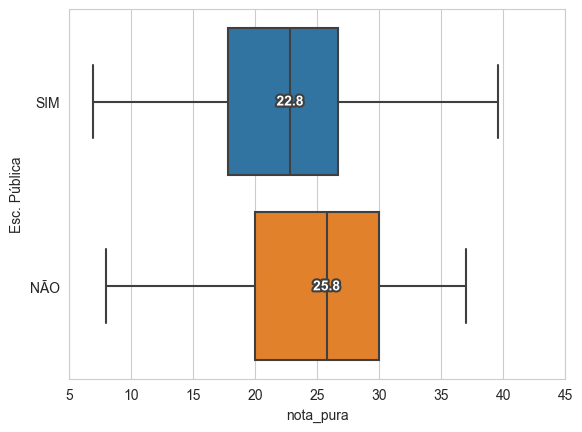

In [50]:
# Comparação boxplot Escola Pública
ax = sns.boxplot(data=df_resultado_sem_ausente,
                 y='Esc. Pública', x='nota_pura',   order=['SIM', 'NÃO'])
plt.xlim(5, 45, 5)
add_median_labels(ax)


# ax.set_xticks(quantiles)

plt.show()


#### Claramente, os resultados da escola pública ficariam bem abaixo dos da escola particular, justificando que as cotas para escola pública normalizam as oportunidades entre a rede pública e provada de ensino.

C:\Users\miria\AppData\Local\Temp\ipykernel_2724\1748206472.py:5: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(5, 45, 5)


(5.0, 45.0)

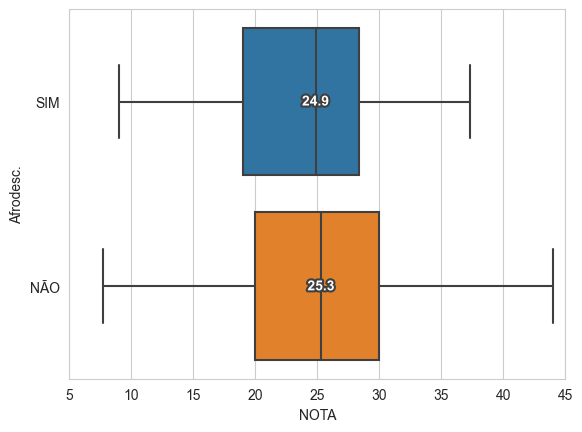

In [41]:
# Comparação boxplot Negros e Brancos
ax = sns.boxplot(data=df_resultado_sem_ausente, y='Afrodesc.', x='NOTA', orient='h',  order=['SIM', 'NÃO'])
add_median_labels(ax)

plt.xlim(5, 45, 5)

##### Analisando os resultados da figura acima, é possível perceber pouca diferença entre os gráficos, refletindo que a escola pública parece não afetar significativamente a configuração de notas dos alunos.
##### Deve ser realçado que os alunos de escola pública recebem 10% a mais na pontuação, e os resultados mostram que pontuação é capaz de equilibrar as notas, diminuindo o gap da educação básica no país.